In [1]:
# Simple CNN model for CIFAR-10
import tensorflow as tf 
from tensorflow import keras
import numpy as np
from tensorflow.keras.models import load_model
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.constraints import maxnorm
from tensorflow.keras import datasets, layers, models
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.optimizers import SGD
import matplotlib.pyplot as plt
from keras import backend as K
K.common.image_dim_ordering()

Using TensorFlow backend.


'tf'

In [2]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [3]:
# load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 8s 0us/step


In [4]:
# normalize inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

In [5]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [6]:
num_classes

10

In [6]:
# Create the model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=X_train.shape[1:], kernel_constraint=maxnorm(3)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1024, activation='relu', kernel_constraint=maxnorm(3)))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        3

In [7]:
# Compile model
epochs = 25
lrate = 0.01
decay = lrate/epochs
sgd = keras.optimizers.SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [8]:
# Fit the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)

Epoch 1/25
1563/1563 [==============================] - 10s 7ms/step - loss: 1.9330 - accuracy: 0.2851 - val_loss: 1.6287 - val_accuracy: 0.4091
Epoch 2/25
1563/1563 [==============================] - 10s 7ms/step - loss: 1.4911 - accuracy: 0.4557 - val_loss: 1.3886 - val_accuracy: 0.4817
Epoch 3/25
1563/1563 [==============================] - 10s 6ms/step - loss: 1.2970 - accuracy: 0.5309 - val_loss: 1.2597 - val_accuracy: 0.5351
Epoch 4/25
1563/1563 [==============================] - 10s 6ms/step - loss: 1.1609 - accuracy: 0.5818 - val_loss: 1.0549 - val_accuracy: 0.6229
Epoch 5/25
1563/1563 [==============================] - 10s 6ms/step - loss: 1.0422 - accuracy: 0.6290 - val_loss: 0.9995 - val_accuracy: 0.6441
Epoch 6/25
1563/1563 [==============================] - 10s 6ms/step - loss: 0.9476 - accuracy: 0.6647 - val_loss: 0.8997 - val_accuracy: 0.6830
Epoch 7/25
1563/1563 [==============================] - 10s 6ms/step - loss: 0.8755 - accuracy: 0.6908 - val_loss: 0.8795 - val_ac

In [9]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 78.62%


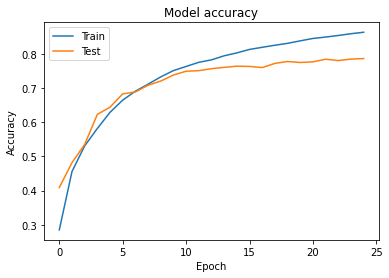

In [12]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

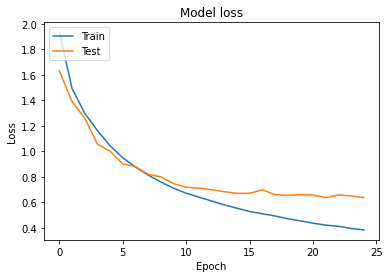

In [13]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [23]:
model.save("mnistmodel.h5")
altmodel = tf.keras.models.load_model("mnistmodel.h5")

In [31]:
for img in range(0,4):
  predict_classe = altmodel.predict_classes(X_test[[img],:])
  print("Predicted class for image: {" + str(img) +"} is: " + str(predict_classe))
  print("Real class for image: {" + str(img) +"} is: " + str(y_test[img]))

Predicted class for image: {0} is: [5]
Real class for image: {0} is: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
Predicted class for image: {1} is: [8]
Real class for image: {1} is: [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
Predicted class for image: {2} is: [8]
Real class for image: {2} is: [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
Predicted class for image: {3} is: [0]
Real class for image: {3} is: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
